In [7]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as ran
import scipy.optimize as opt
import scipy.stats as stat
from astropy.io import ascii
from astropy.table import Table
from statistics import stdev
%matplotlib inline

In [140]:
def plot_minus_bkgd(filename,number):
    
    data = ascii.read(filename)
    data = Table(data)

    freq = data['Frequecncy(Hz)']
    #print(len(freq))
    amp = data['Amplitude(dBm)']
    amp = (10**(amp/10.))/(3.33*10**7)
    amp = ((amp/(10**(.2)))/(10**(3.7)))*(20)
    x = np.concatenate((freq[0:100],freq[360:461]),axis=0)
    y = np.concatenate((amp[0:100],amp[360:461]),axis=0)
    
    #print(freq)
    vel = -(0.00021)*((1420.4*10**6)-freq) #km/s
    #print(vel)
    #print(y)
    
    #The next piece of the code (lines 22-82) is adapted from code written written by Dr. David Smith for the 
    #Physics 133 Course at the University of California, Santa Cruz.
    
    def fitfunction(x,*p):
        return p[0] + p[1]*x + p[2]*(x**2)
    
    #Put in some initial guess parameters (you may have to fiddle around -- the fitting algorithm)
    #prefers to start somewhere near the truth to be effective.
    guessparams = np.array([1,1,1])

    yerr = stdev(y)*np.ones(len(y))


    plt.figure()
    plt.plot(x, y)
    #plt.errorbar(A[0], modzA, xerr=Aerr[0], yerr=yerr, fmt = '.', capthick =2, capsize=3, color="blue", ecolor="black")
    #plt.title("Box A Impedance Magnitude vs. Frequency ")
    #plt.xlabel(r"Frequency $\nu$ (Hz)")
    #plt.ylabel(r"Impedance Magnitude |z| ($\Omega$)")

    #Create a large array of "x" points and use that to plot a smooth version of the
    #fitting function with the original guess parameters (in green):
    #This is just for display purposes, it's not a necessary part of the fitting!
    xsmooth1 = np.linspace(np.min(x),np.max(x),len(amp))
    #The following two lines can be commented out if you don't want to plot the
    #shape of the model function before the fitting process (a good idea for most
    #situations, except when you are debugging the fitting process):
    fsmooth1 = fitfunction(xsmooth1,*guessparams)
    #plt.plot(xsmooth1,fsmooth1)

    #Now do the fit.  The two things on the left of the = sign (what is returned by the 
    #function opt.curve_fit) are the best values of the parameters and the covariance matrix
    #associated with the parameters.  The errors on the parameters are the square root of the
    #diagonal elements of the covariance matrix.  Print out the fitted parameters and their errors.
    #"absolute_sigma" means "really believe me that my 'sigma' are my real error bars."
    #"p0" is the original guesses at the fit parameters. The first three arguments are the name
    #of the fit function (defined above) and the x and y data values.
    #print len(A[0])
    #print len(modzA)
    #print len(yerr)
    popt, pcov = opt.curve_fit(fitfunction, x, y, sigma=yerr, p0=guessparams,absolute_sigma=1)
    #for i in range(0,len(popt)):
    #    print('param ',i,' = ',popt[i], '+/-', np.sqrt(pcov[i,i]))

    #Now prepare and plot what the fitted function looks like with the best parameters (in red):
    fsmooth2 = fitfunction(xsmooth1,*popt)
    plt.plot(xsmooth1,fsmooth2)

    #Calculate the actual value of chi-square for hypothesis testing.
    #Note: it is kind of sad that curve_fit doesn't return this, the
    #equivalent routine in most languages does.  "dof" = degrees of freedom.
    #Here we show two interpretations of the hypothesis test.

    yfit= fitfunction(x,*popt)
    chisq = sum( (y-yfit)**2 / yerr**2 )
    dof = len(x) - len(popt)
    chisq_reduced = chisq/float(dof)
    #print('Chi-square, degrees of freedom, reduced chi-square: ',chisq,dof,chisq_reduced)
    #print('Probability of exceeding this chi-square by chance for correct model: ',1.-stat.chi2.cdf(chisq,dof))
    #print('With what confidence can we reject this model? ',stat.chi2.cdf(chisq,dof))

    #plt.savefig('impvsfreqA.pdf', format='pdf', dpi=1000)
    plt.show()
    #print(yfit)
    
    #plt.plot(freq,amp-fsmooth2)
    
    brighttemp = (1/(2*1.38064852)*(10**23))*(amp-fsmooth2)
    deltav = (vel[460]-vel[0])/461
    
    coldensity = (1.8224*10**18)*np.sum(brighttemp*deltav)
    
    plt.figure()
    plt.scatter(vel,brighttemp, marker ='.')
    plt.title('Brightness temperature vs. velocity (Frame '+str(number)+')', fontsize = 15, y=1.05)
    plt.xlabel('v (km/s)')
    plt.ylabel('T$_B$ (K)')
    plt.savefig('/users/sarahbowman/Desktop/Astr135B/fig'+str(number)+'.png',format='png')

    cold.append(coldensity)
    

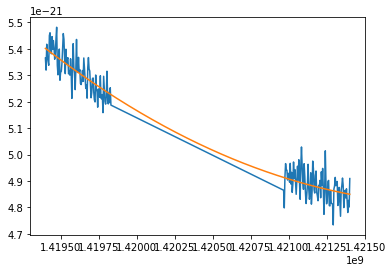

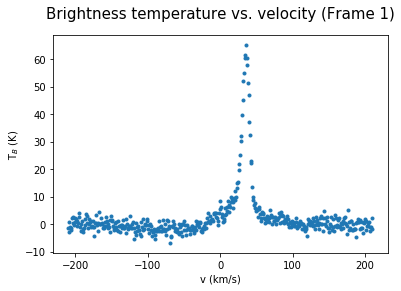

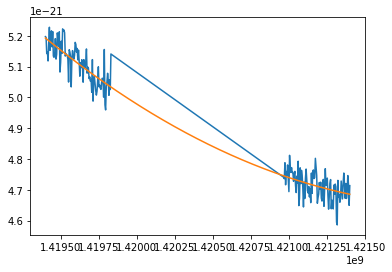

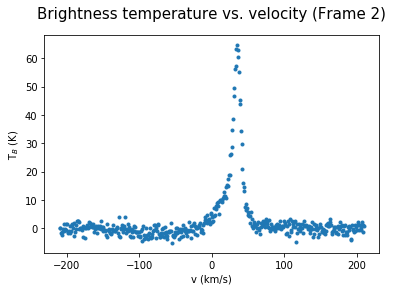

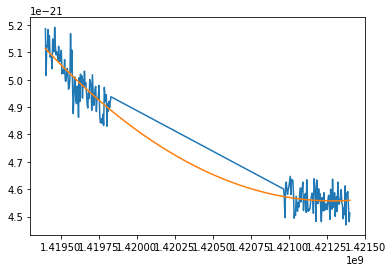

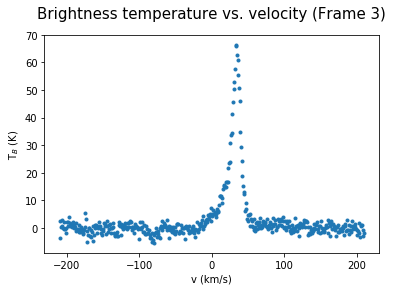

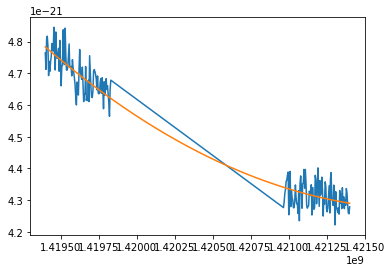

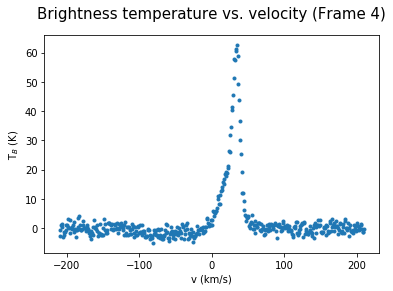

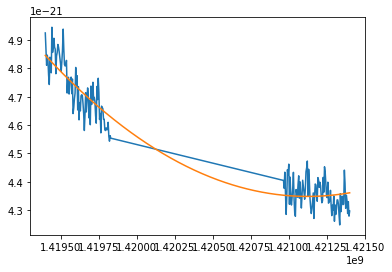

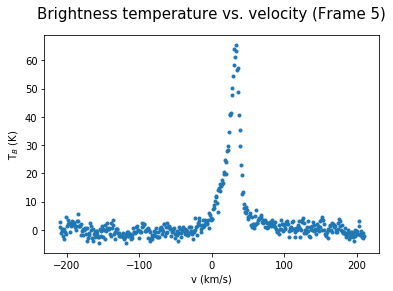

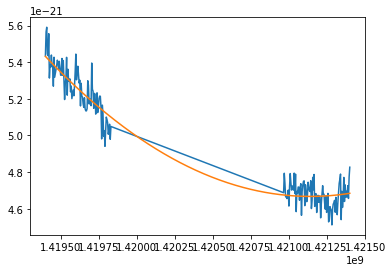

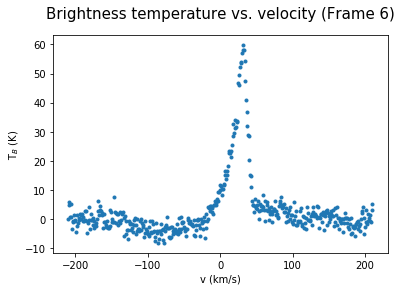

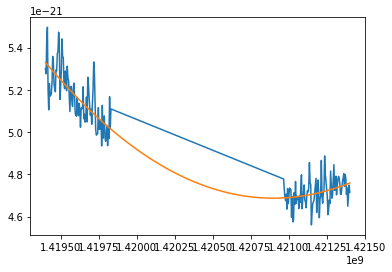

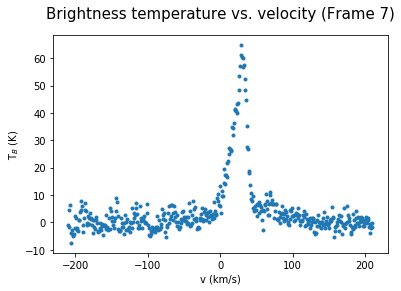

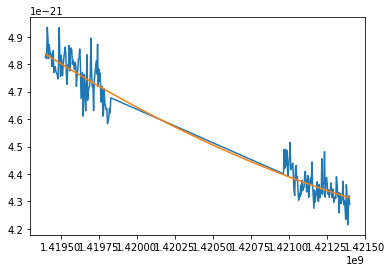

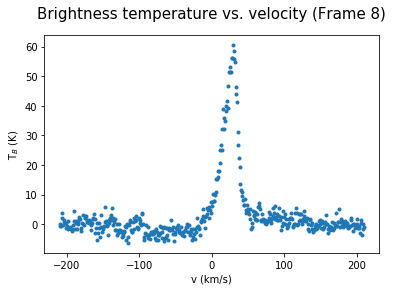

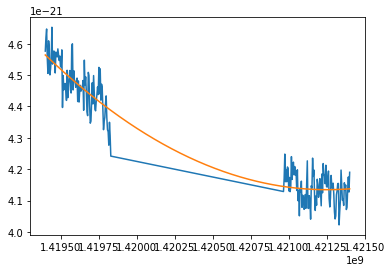

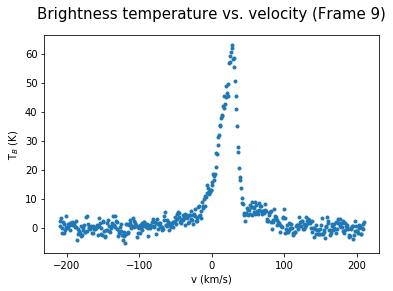

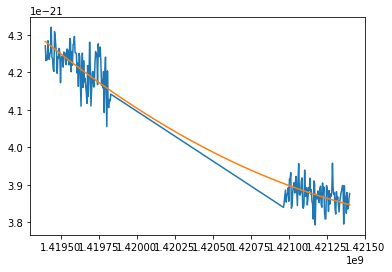

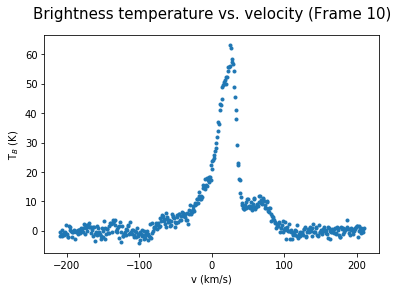

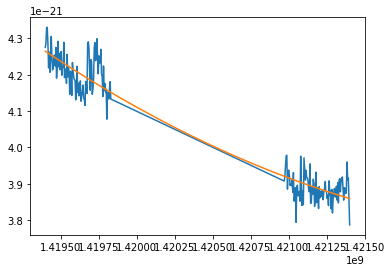

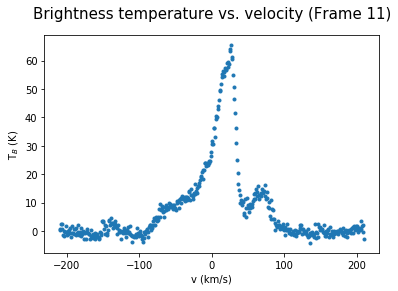

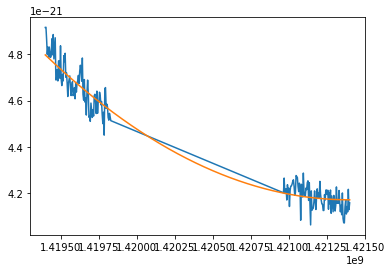

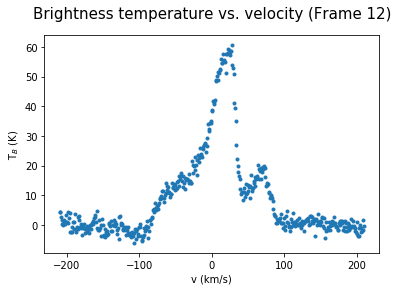

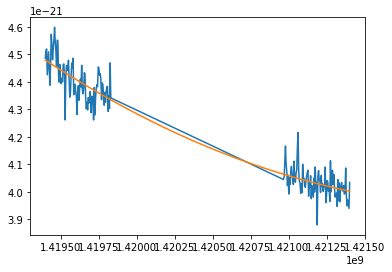

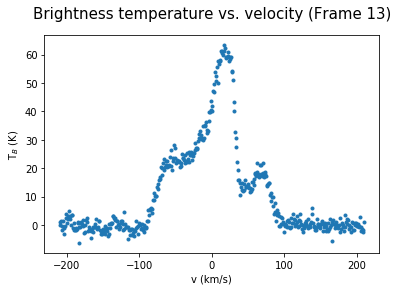

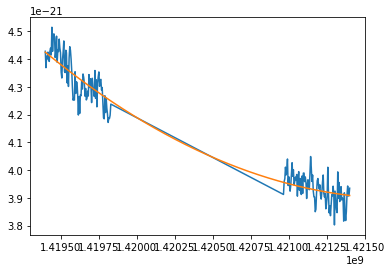

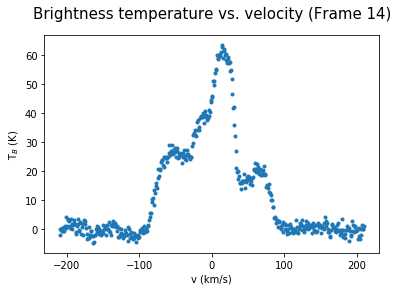

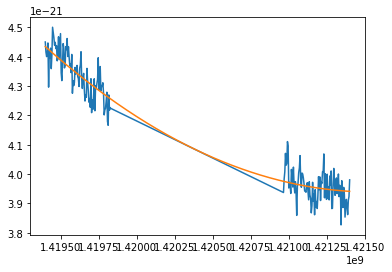

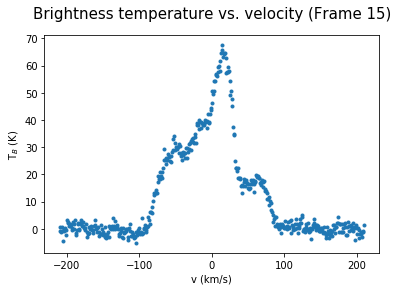

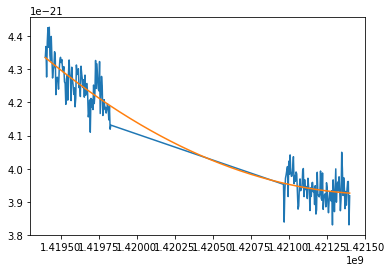

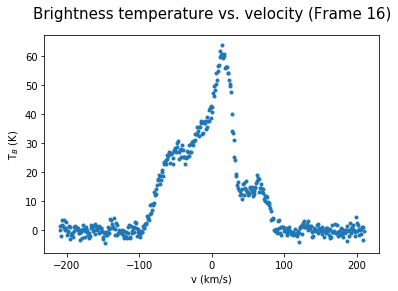

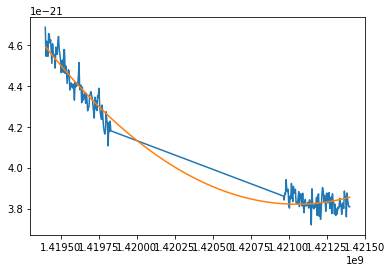

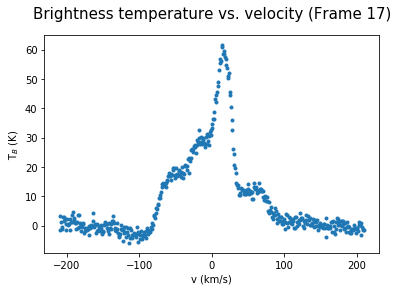

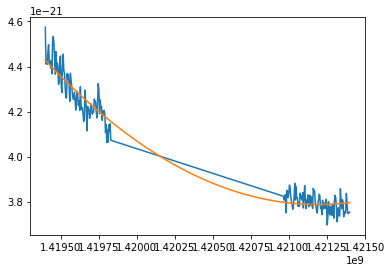

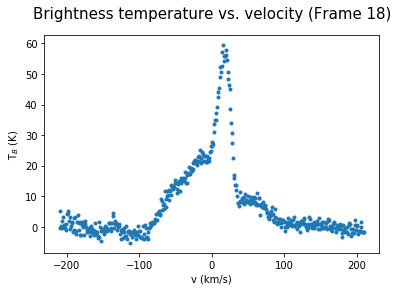

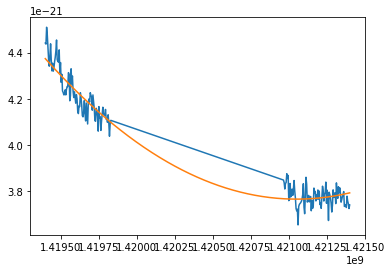

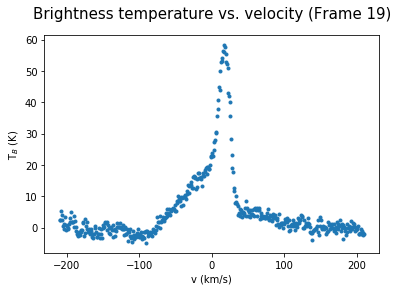

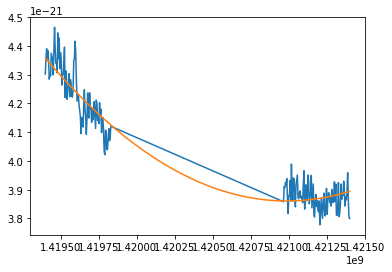

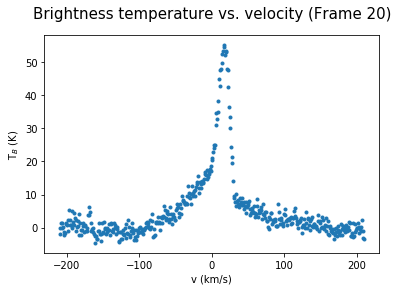

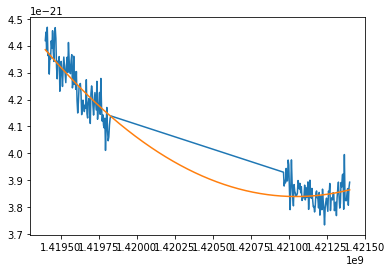

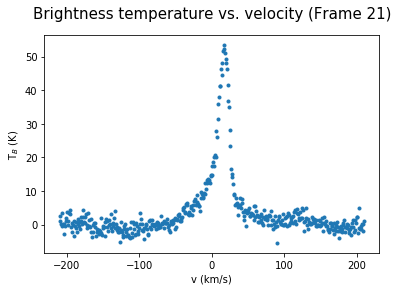

In [141]:
cold = []
plot_minus_bkgd('trace001.txt',1)
plot_minus_bkgd('TRACE002.txt',2)
plot_minus_bkgd('TRACE003.txt',3)
plot_minus_bkgd('TRACE004.txt',4)
plot_minus_bkgd('TRACE005.txt',5)
plot_minus_bkgd('TRACE006.txt',6)
plot_minus_bkgd('TRACE007.txt',7)
plot_minus_bkgd('TRACE008.txt',8)
plot_minus_bkgd('TRACE009.txt',9)
plot_minus_bkgd('TRACE010.txt',10)
plot_minus_bkgd('TRACE011.txt',11)
plot_minus_bkgd('TRACE012.txt',12)
plot_minus_bkgd('TRACE013.txt',13)
plot_minus_bkgd('TRACE014.txt',14)
plot_minus_bkgd('TRACE015.txt',15)
plot_minus_bkgd('TRACE016.txt',16)
plot_minus_bkgd('TRACE017.txt',17)
plot_minus_bkgd('TRACE018.txt',18)
plot_minus_bkgd('TRACE019.txt',19)
plot_minus_bkgd('TRACE020.txt',20)
plot_minus_bkgd('TRACE021.txt',21)

In [142]:
cold

[1.822079615102018e+21,
 1.9569237107022386e+21,
 2.2168245935460558e+21,
 1.8038720067892617e+21,
 2.557035069827487e+21,
 2.3358820312855088e+21,
 3.3614613810735633e+21,
 2.460043480409869e+21,
 3.907959844221464e+21,
 4.700255433187078e+21,
 5.946295517904654e+21,
 6.813838088400245e+21,
 8.446099939126318e+21,
 9.104268636356969e+21,
 9.193074046950006e+21,
 8.383205945957955e+21,
 6.606903494618558e+21,
 5.315587822409138e+21,
 4.035282849943376e+21,
 3.857735925745715e+21,
 2.7367581134052666e+21]

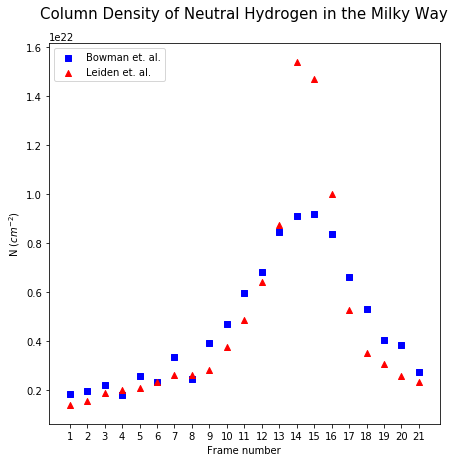

In [146]:
framenum = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
accepted = [1.39E+21,1.56E+21,1.89E+21,2.01E+21,2.09E+21,2.34E+21,2.60E+21,2.62E+21,2.82E+21, \
            3.74E+21,4.85E+21,6.41E+21,8.76E+21,1.54E+22,1.47E+22,1.00E+22,5.28E+21,3.51E+21, \
            3.05E+21,2.56E+21,2.33E+21]
plt.figure(figsize = [7,7])
plt.scatter(framenum,cold,marker = 's',color='blue',label='Bowman et. al.')
plt.scatter(framenum,accepted,marker = '^',color='red',label='Leiden et. al.')
plt.xticks(np.arange(1,22,1))
#plt.grid()
plt.xlabel('Frame number')
plt.ylabel('N ($cm^{-2}$)')
plt.title('Column Density of Neutral Hydrogen in the Milky Way', fontsize = 15, y=1.05)
plt.legend(loc='upper left')
plt.savefig('/users/sarahbowman/Desktop/Astr135B/fig23.png',format='png')
plt.show()